In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.model_selection import train_test_split

In [29]:
train = pd.read_csv('train.csv')
train_update = pd.read_csv('train_updates_20220929.csv')

train_update_seq_id = train_update.pop('seq_id')
train_update.dropna(how='all', inplace=True)
train_update_ready = train_update.merge(train_update_seq_id, how='left', left_index=True, right_index=True)

train.update(train_update_ready)

train.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0.0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1.0,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2.0,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3.0,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4.0,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [5]:
seq_code = []
protomw = []
q_at_pH = []
instability = []
flexibility = []
gravy = []

for i in range(len(train['protein_sequence'])):
    new_code = Seq(train['protein_sequence'].iloc[i])
    seq_code.append(new_code)
    pro_an = ProteinAnalysis(train['protein_sequence'].iloc[i])
    protomw.append(pro_an.molecular_weight())
    q_at_pH.append(pro_an.charge_at_pH(train['pH'].iloc[i]))
    instability.append(pro_an.instability_index())
    flexibility.append(pro_an.flexibility())
    gravy.append(pro_an.gravy())
    
seq_df = pd.DataFrame({"biopython_seq": seq_code, "molecular_weight": protomw, "charge_at_pH": q_at_pH, "instability": instability, "flexibility": flexibility, "gravy": gravy})
seq_df.head()

,biopython_seq,molecular_weight,charge_at_pH,instability,flexibility,gravy
0,"(A, A, A, A, K, A, A, A, L, A, L, L, G, E, A, ...",36320.7244,-1.872851,28.389736,"[0.9816666666666666, 0.9981785714285716, 0.989...",0.148094
1,"(A, A, A, D, G, E, P, L, H, N, E, E, E, R, A, ...",32837.9931,-12.720355,65.108392,"[1.0370119047619046, 1.018095238095238, 1.0032...",-1.089510
2,"(A, A, A, F, S, T, P, R, A, T, S, Y, R, I, L, ...",53428.8034,11.730622,35.089336,"[0.987547619047619, 1.0112976190476188, 0.9999...",-0.710463
3,"(A, A, A, S, G, L, R, T, A, I, P, A, Q, P, L, ...",29475.5996,-20.561692,50.502264,"[0.9806190476190478, 1.0057738095238096, 0.990...",-0.507925
4,"(A, A, A, T, K, S, G, P, R, R, Q, S, Q, G, A, ...",158761.9814,-21.664651,45.668808,"[1.0195714285714286, 1.0309166666666667, 1.038...",-0.400896


In [30]:
bigset = train.join(seq_df)
bigset['pH'].fillna(7, inplace = True)
bigset.set_index('seq_id')

,protein_sequence,pH,data_source,tm,biopython_seq,molecular_weight,charge_at_pH,instability,flexibility,gravy
seq_id,,,,,,,,,,
0.0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,"(A, A, A, A, K, A, A, A, L, A, L, L, G, E, A, ...",36320.7244,-1.872851,28.389736,"[0.9816666666666666, 0.9981785714285716, 0.989...",0.148094
1.0,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,"(A, A, A, D, G, E, P, L, H, N, E, E, E, R, A, ...",32837.9931,-12.720355,65.108392,"[1.0370119047619046, 1.018095238095238, 1.0032...",-1.089510
2.0,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,"(A, A, A, F, S, T, P, R, A, T, S, Y, R, I, L, ...",53428.8034,11.730622,35.089336,"[0.987547619047619, 1.0112976190476188, 0.9999...",-0.710463
3.0,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,"(A, A, A, S, G, L, R, T, A, I, P, A, Q, P, L, ...",29475.5996,-20.561692,50.502264,"[0.9806190476190478, 1.0057738095238096, 0.990...",-0.507925
4.0,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,"(A, A, A, T, K, S, G, P, R, R, Q, S, Q, G, A, ...",158761.9814,-21.664651,45.668808,"[1.0195714285714286, 1.0309166666666667, 1.038...",-0.400896
...,...,...,...,...,...,...,...,...,...,...
31385.0,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8,"(Y, Y, M, Y, S, G, G, G, S, A, L, A, A, G, G, ...",61997.6230,6.028246,48.604026,"[0.9931666666666665, 1.00875, 1.01382142857142...",-0.538434
31386.0,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2,"(Y, Y, N, D, Q, H, R, L, S, S, Y, S, V, E, T, ...",52637.6897,-3.300748,35.285096,"[0.987404761904762, 1.0154880952380954, 0.9881...",-0.098934
31387.0,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6,"(Y, Y, Q, R, T, L, G, A, E, L, L, Y, K, I, S, ...",14203.9225,-3.059950,44.198437,"[0.9807380952380953, 1.0137261904761905, 0.989...",-0.332812


In [31]:
bigset.isna().sum()

seq_id                 0
protein_sequence       0
pH                     0
data_source         3347
tm                     0
biopython_seq          0
molecular_weight       0
charge_at_pH         286
instability            0
flexibility            0
gravy                  0
dtype: int64

In [32]:
bigset.corr()

,seq_id,pH,tm,molecular_weight,charge_at_pH,instability,gravy
seq_id,1.000000,-0.037965,0.008612,-0.001336,0.011028,-0.063194,0.010816
pH,-0.037965,1.000000,-0.042407,0.020730,-0.193794,0.089667,0.031143
tm,0.008612,-0.042407,1.000000,-0.060350,0.015027,-0.025711,0.157289
molecular_weight,-0.001336,0.020730,-0.060350,1.000000,-0.407391,0.165758,-0.089049
charge_at_pH,0.011028,-0.193794,0.015027,-0.407391,1.000000,-0.082018,0.018609
instability,-0.063194,0.089667,-0.025711,0.165758,-0.082018,1.000000,-0.379495
gravy,0.010816,0.031143,0.157289,-0.089049,0.018609,-0.379495,1.000000


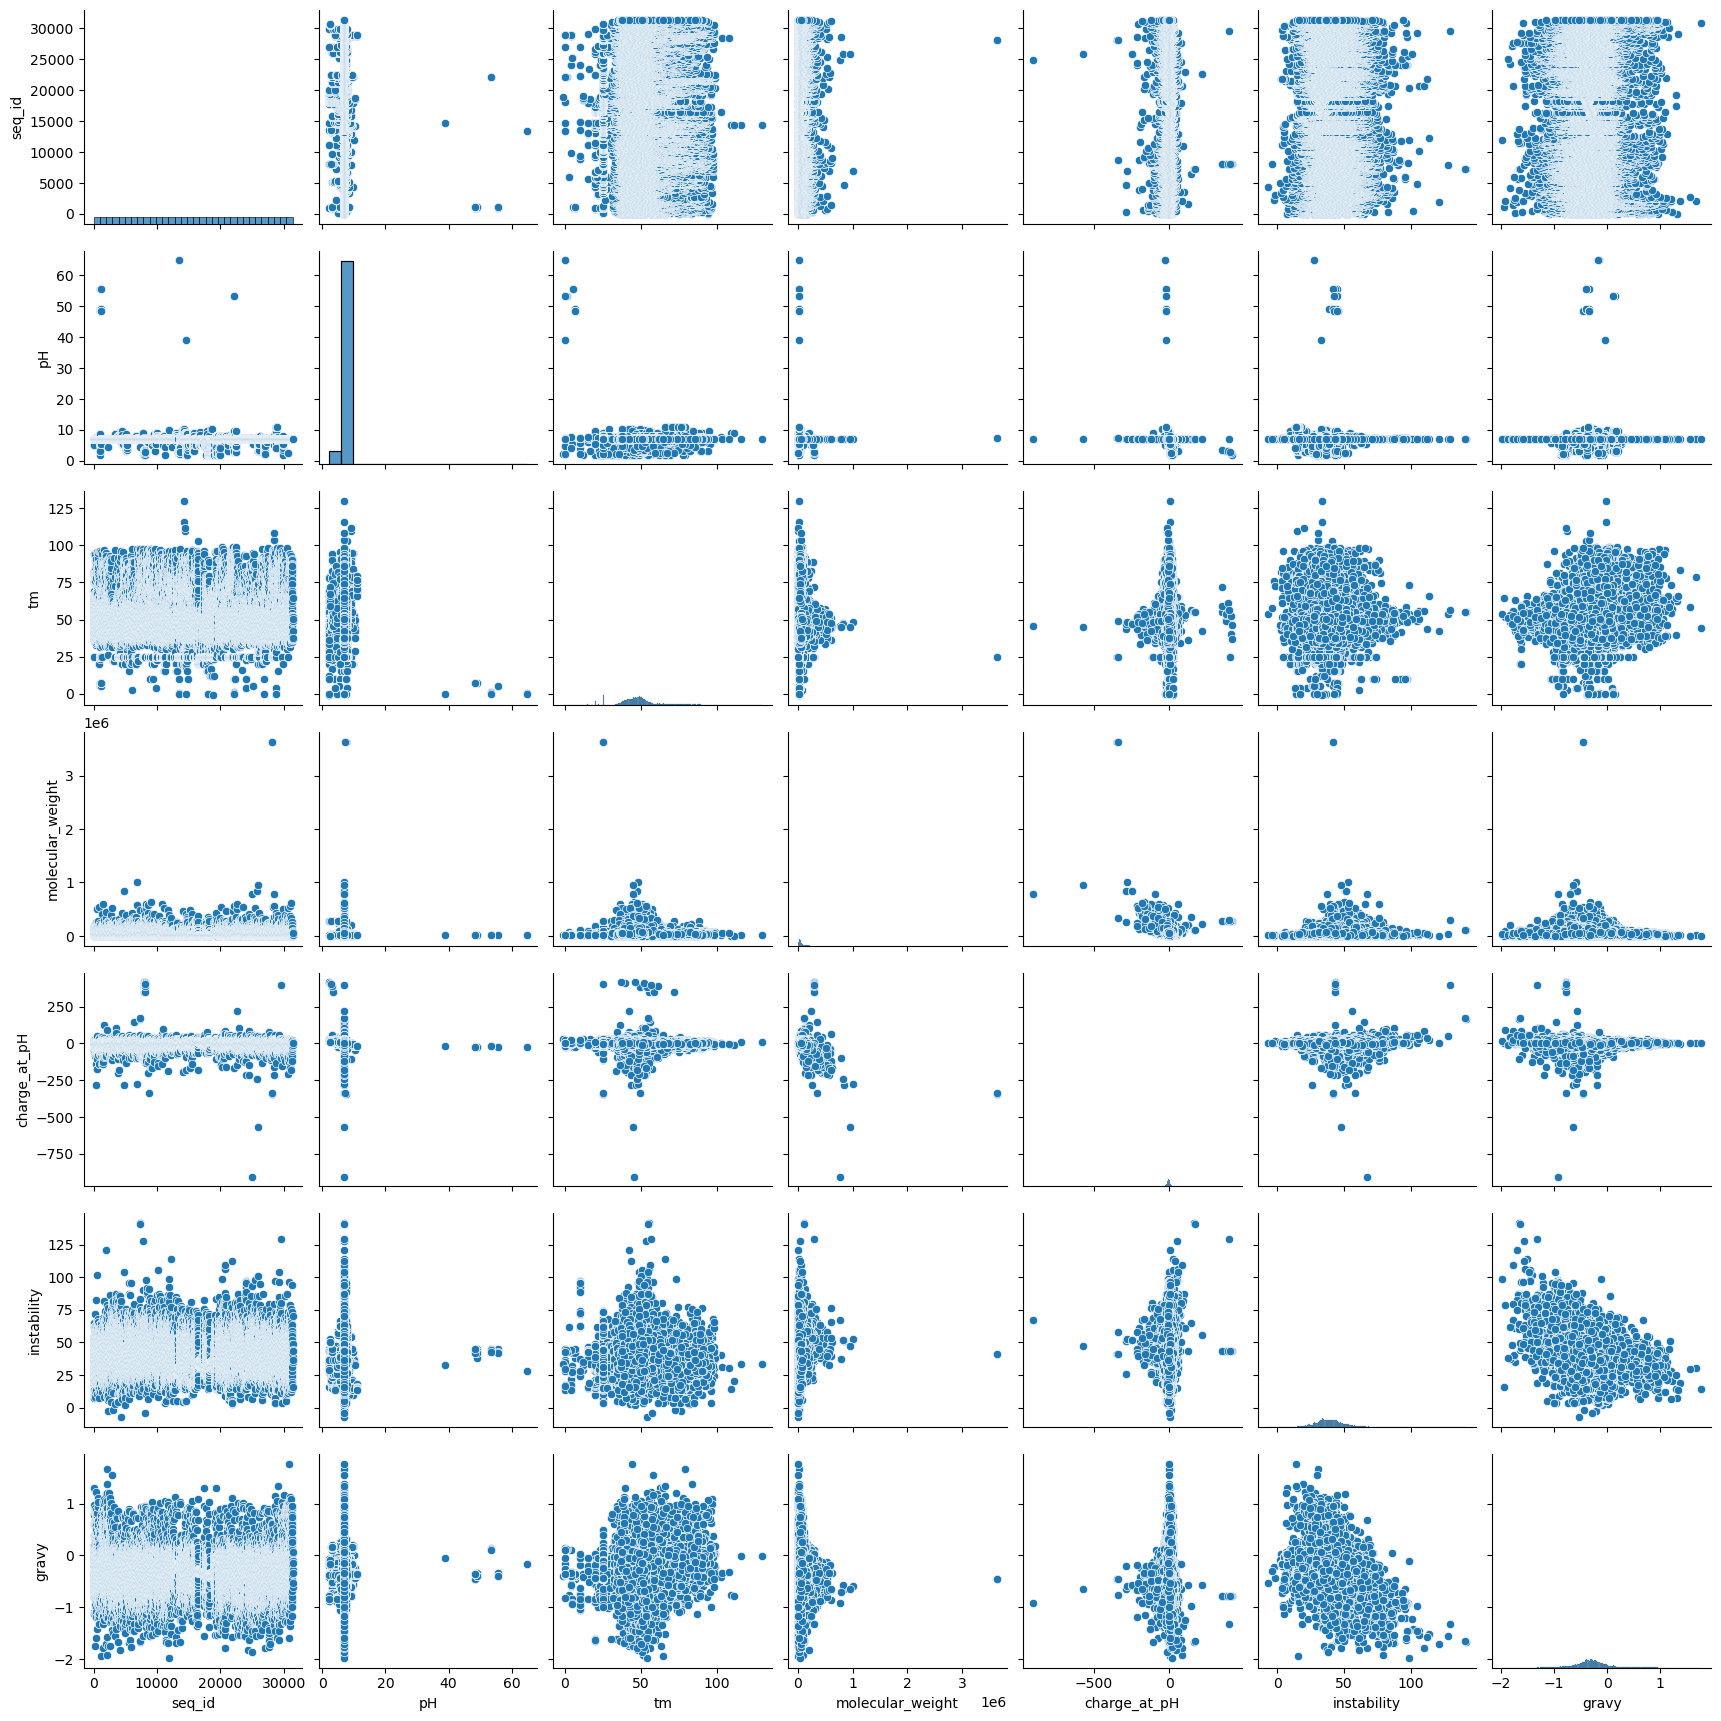

In [47]:
sns.pairplot(bigset)

<AxesSubplot:>

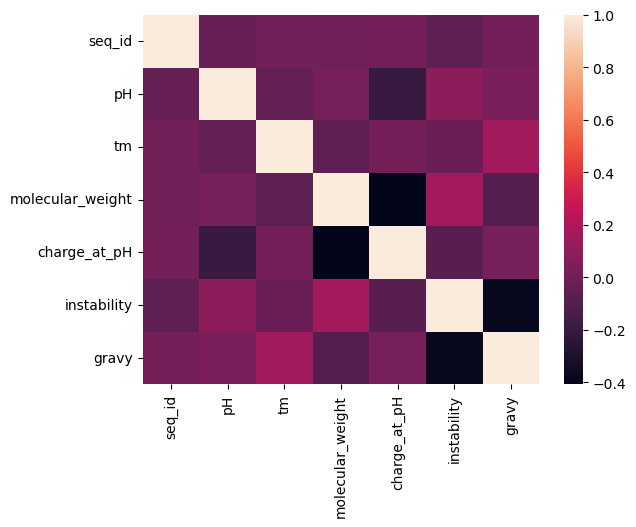

In [48]:
sns.heatmap(bigset.corr())

In [69]:
data_factors = bigset[['pH', 'molecular_weight', 'instability', 'gravy']]
data_results = bigset[['tm']]

X_train, X_test, y_train, y_test = train_test_split(data_factors, data_results, test_size=0.25)
X_test

,pH,molecular_weight,instability,gravy
28342,7.0,48845.0339,32.967442,-0.411395
2051,7.0,37504.6402,38.881115,-0.262539
11035,8.0,60761.1916,36.822905,-0.490503
18727,2.0,18665.3062,32.488415,-0.364024
17111,7.0,25489.1066,33.200866,-0.281818
...,...,...,...,...
11051,8.0,60789.2447,36.410615,-0.484730
9481,7.0,32175.6134,28.619097,-0.129861
30773,7.0,61540.0610,37.486643,0.458707
23386,7.0,75818.3121,40.323818,-0.441515


In [62]:
Novo_model = sm.OLS(y_train, X_train)
Novo_model_results = Novo_model.fit()
Novo_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     tm   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                          4.734e+04
Date:                Thu, 10 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:56:09   Log-Likelihood:                     -1.0010e+05
No. Observations:               23542   AIC:                                  2.002e+05
Df Residuals:                   23538   BIC:                                  2.002e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
pH                   3.9854      0.046     86.102      0.000       3.895       4.076
molecular_weight -7.381e-06   1.59e-06     -4.640      0.000   -1.05e-05   -4.26e-06
instability          0.5747      0.009     63.856      0.000       0.557       0.592
gravy                8.0429      0.383     20.976      0.000       7.291       8.794
==============================================================================
Omnibus:                    12877.859   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1004221.954
Skew:                          -1.784   Prob(JB):                         0.00
Kurtosis:                      34.797   Cond. No.                     3.00e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

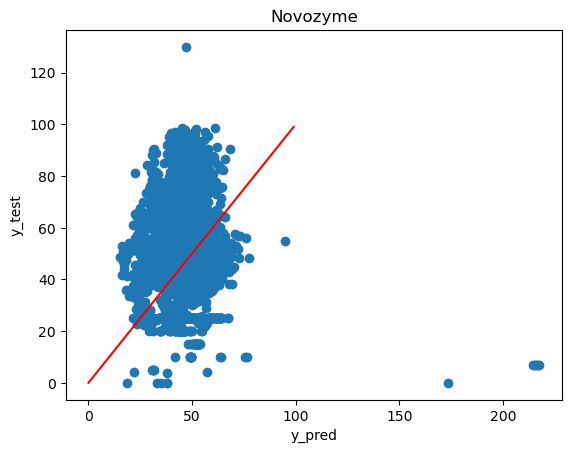

In [63]:
y_pred = Novo_model_results.predict(X_test)

_ = plt.scatter(y_pred, y_test)
_ = plt.plot([x for x in range(0,100)], [x for x in range(0,100)], color = 'red')

plt.title('Novozyme')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [95]:
novo_test = pd.read_csv('test.csv')
novo_test.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [96]:
seq_code = []
protomw = []
q_at_pH = []
instability = []
flexibility = []
gravy = []

for i in range(len(novo_test['protein_sequence'])):
    new_code = Seq(novo_test['protein_sequence'].iloc[i])
    seq_code.append(new_code)
    pro_an = ProteinAnalysis(novo_test['protein_sequence'].iloc[i])
    protomw.append(pro_an.molecular_weight())
    q_at_pH.append(pro_an.charge_at_pH(novo_test['pH'].iloc[i]))
    instability.append(pro_an.instability_index())
    flexibility.append(pro_an.flexibility())
    gravy.append(pro_an.gravy())
    
seq_df = pd.DataFrame({"biopython_seq": seq_code, "molecular_weight": protomw, "charge_at_pH": q_at_pH, "instability": instability, "flexibility": flexibility, "gravy": gravy})

novo_set = novo_test.join(seq_df)
novo_set['pH'].fillna(7, inplace = True)
novo_set.set_index('seq_id')

,protein_sequence,pH,data_source,biopython_seq,molecular_weight,charge_at_pH,instability,flexibility,gravy
seq_id,,,,,,,,,
31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,"(V, P, V, N, P, E, P, D, A, T, S, V, E, N, V, ...",23910.2619,2.558953,43.819955,"[1.043202380952381, 1.0334166666666664, 1.0446...",-0.771041
31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,"(V, P, V, N, P, E, P, D, A, T, S, V, E, N, V, ...",23909.3202,4.548770,43.819955,"[1.043202380952381, 1.0334166666666664, 1.0446...",-0.772851
31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes,"(V, P, V, N, P, E, P, D, A, T, S, V, E, N, V, ...",23781.1479,3.558671,43.973682,"[1.043202380952381, 1.0334166666666664, 1.0446...",-0.758636
31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,"(V, P, V, N, P, E, P, D, A, T, S, V, E, N, V, ...",23869.2761,2.477663,45.295068,"[1.043202380952381, 1.0334166666666664, 1.0446...",-0.709050
31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,"(V, P, V, N, P, E, P, D, A, T, S, V, E, N, V, ...",23913.3070,2.568572,43.819955,"[1.043202380952381, 1.0334166666666664, 1.0446...",-0.707692
...,...,...,...,...,...,...,...,...,...
33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,"(V, P, V, N, P, E, P, D, A, T, S, V, E, N, V, ...",23936.3852,3.558671,44.307285,"[1.043202380952381, 1.0334166666666664, 1.0446...",-0.725792
33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,"(V, P, V, N, P, E, P, D, A, T, S, V, E, N, V, ...",23936.3852,3.558671,43.435792,"[1.043202380952381, 1.0334166666666664, 1.0446...",-0.728959
33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,"(V, P, V, N, P, E, P, D, A, T, S, V, E, N, V, ...",23937.3302,3.558671,43.435792,"[1.043202380952381, 1.0334166666666664, 1.0446...",-0.761991


In [101]:
Novo_Test_Data = novo_set[['pH', 'molecular_weight', 'instability', 'gravy']]
y_pred = Novo_model_results.predict(Novo_Test_Data)
y_pred = pd.DataFrame(y_pred)
y_pred.reset_index(inplace=True)
y_pred.rename(columns={'index':'seq_id', 0:'tm'})

,seq_id,tm
0,0,50.688062
1,1,50.673512
2,2,50.877127
3,3,52.034678
4,4,51.197544
...,...,...
2408,2408,51.331863
2409,2409,50.805553
2410,2410,50.539876
2411,2411,51.109983


In [108]:
y_pred.to_csv('results.csv', index = False, header = ['seq_id', 'tm'])